# Modeling:
We want to use the historical data from  cell's daily performance monitoring data last year, such as 'START_TIME', 'GRANULARITY', 'ENODEB', 'CELL', 'UL_TRF', 'UU_TRF', 'RATE_RRC', 'RATE_ERAB' ..etc., to group the cells into different clusters identify the performance scenario for each cell, then after the scenario is identified, then we can apply specific network optimization according to different scenario!

# Data description

COLUMNS|DESCRIPTION| UNIT
------|------|---------  
START_TIME|  
GRANULARITY| MEASUREMENT UNIT | minitue
ENODEB |ENHANCE NODEB| 
CELL|
UL_TRF |UPLINK TRAFFIC OF UU (UE-Use Equipment) TO Utran) | MB
UU_TRF |DOWNLINK TRAFFIC OF UU | MB 
RATE_RRC | SUCCESS RATE FOR RRC CONNECTION | %
RATE_ERAB|SUCCESS RATE FOR ERAB SETUP | %
RATE_RADIO |SUCCESS RATE FOR RADIO ACCESS| % 
HO_INTRA| HANDOVER SUCCESS RATE FOR INTRA-ENODEB | %
HO_INTER |HANDOVER SUCCESS RATE FOR INTER-ENODEB | %
HO |HANDOVER SUCCESS RATE |%
DROP_RATE|CALL DROP RATE |%
RATE_CSFB,|CSFB SUCCESS RATE | %
UL_PRB_AVG_RATE| AVERAGE USE RATE FOR UPLINK PRB |%
DL_PRB_AVG_RATE|AVERAGE USE RATE FOR DOWNLINK PRB|%
MAX_USERS|TRAFIC MAXMUM USERS IN CELL |
UL_INTERFERENCE_AVG_PRB| average interference noise value on each uplink PRB subcarrier| db

# Load the data
Tasks:
1. import the module of numpy ,pandas,matplotlib
1. read the data from 'datasets/CELL_KPI_201711.csv'
2. show the first 5 rows of the data

In [49]:
# import the module of numpy ,pandas,matplotlib
# About 4 lines code:





In [ ]:
# read the data from 'datasets/CELL_KPI_201711.csv' as data and show the first 5 rows of the data
# About 2 lines code:




In [50]:
# Eexpected output as following:

,START_TIME,GRANULARITY,ENODEB,CELL,UL_TRF,UU_TRF,RATE_RRC,RATE_ERAB,RATE_RADIO,HO_INTRA,HO_INTER,HO,DROP_RATE,RATE_CSFB,UL_PRB_AVG_RATE,DL_PRB_AVG_RATE,MAX_USERS,UL_INTERFERENCE_AVG_PRB
0,11/23/2017 09:00:00,15,EEIF,4485,23.341,43.276,99.673,100.000,99.673,89.583,100,92.248,0.342,100,NIL,5.640,13,-119
1,11/23/2017 09:00:00,15,GBHG,6176,9.435,69.750,100.000,100.000,100.000,100,100,100,0.000,100,NIL,6.992,27,-119
2,11/23/2017 09:00:00,15,GAGC,9092,11.973,180.969,99.810,99.878,99.688,100,NIL,100,0.000,100,NIL,8.338,30,-119
3,11/23/2017 09:00:00,15,EBIB,4181,68.619,655.644,99.960,99.928,99.888,98.967,97.406,98.077,0.134,97.619,NIL,56.424,184,-112
4,11/23/2017 09:00:00,15,HFBE,7514,33.052,346.267,100.000,100.000,100.000,98.585,98.958,98.634,0.137,100,NIL,25.609,114,-112


# Exploring the data 
Tasks:
1. show the columns of the data
2. show the size of the data
4. count the missing values in the dataset
3. calculate the basic statistics of the data
6. plot the data as a 3d figure with x-axis= UL_TRF,y=axis.UL_INTERFERENCE_AVG_PRB, z-axis =MAX_USERS

In [ ]:
# show the columns of the data
# About 1 lines code:



# show the size of the data
# About 1 lines code:


# get the basic infomation of  the dataset
# About 1 lines code:



In [3]:
# Eexpected output as following:

Index(['START_TIME', 'GRANULARITY', 'ENODEB', 'CELL', 'UL_TRF', 'UU_TRF',
       'RATE_RRC', 'RATE_ERAB', 'RATE_RADIO', 'HO_INTRA', 'HO_INTER', 'HO',
       'DROP_RATE', 'RATE_CSFB', 'UL_PRB_AVG_RATE', 'DL_PRB_AVG_RATE',
       'MAX_USERS', 'UL_INTERFERENCE_AVG_PRB'],
      dtype='object')
(864, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 18 columns):
START_TIME                 864 non-null object
GRANULARITY                864 non-null int64
ENODEB                     864 non-null object
CELL                       864 non-null int64
UL_TRF                     864 non-null float64
UU_TRF                     864 non-null float64
RATE_RRC                   864 non-null float64
RATE_ERAB                  864 non-null float64
RATE_RADIO                 864 non-null float64
HO_INTRA                   864 non-null object
HO_INTER                   864 non-null object
HO                         864 non-null object
DROP_RATE                  

In [ ]:
# Calculate the basic statistics of the data
# About 1 lines code:



In [4]:
# Eexpected output as following:

,GRANULARITY,CELL,UL_TRF,UU_TRF,RATE_RRC,RATE_ERAB,RATE_RADIO,DROP_RATE,DL_PRB_AVG_RATE,MAX_USERS,UL_INTERFERENCE_AVG_PRB
count,864.0,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,15.0,5507.563657,34.569287,368.227076,99.881072,99.978699,99.859940,0.111292,25.797708,65.637731,-116.039352
std,0.0,2615.484455,32.317398,291.770876,0.270438,0.107920,0.337732,0.230544,22.059426,66.387217,3.314469
min,15.0,1020.000000,0.210000,0.185000,95.745000,98.201000,94.022000,0.000000,2.272000,7.000000,-120.000000
25%,15.0,3227.000000,9.040500,125.205250,99.835000,100.000000,99.825750,0.000000,8.412000,22.000000,-119.000000
50%,15.0,5539.500000,24.208000,309.358500,100.000000,100.000000,99.960000,0.000000,15.799000,40.000000,-117.500000
75%,15.0,7832.000000,50.489750,556.802750,100.000000,100.000000,100.000000,0.163000,40.952000,81.000000,-112.000000
max,15.0,9992.000000,177.250000,1828.730000,100.041000,100.000000,100.041000,2.690000,78.398000,407.000000,-110.000000


In [ ]:
# plot the data as a 3d figure with x-axis= UL_TRF,y=axis.UL_INTERFERENCE_AVG_PRB, z-axis =MAX_USERS
# About 8 lines code:








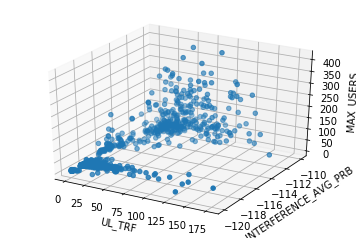

In [5]:
# Eexpected output as following:

# Feature engineering(Data Preprocessing)
Tasks:Create a new column named 'TRAFFICE'   
1. select the columns of 'UL_TRF','UU_TRF','MAX_USERS','UL_INTERFERENCE_AVG_PRB'
2. show the first 5 rows of the selected data
3. concate the columns of 'UL_TRF'and 'UU_TRF' into a new column named 'TRAFFICE'
4. drop the old columns 'UL_TRF'and 'UU_TRF' and the  the first 5 rows of the new dataframe
5. show the basic infomation of the new dataframe
Hint:
1. using the df.copy() method to copy a dataframe from the origianl datasets when Chained assignment,to escape SettingwithCopyWarning in pandas

### Create a new column named 'TRAFFICE'

In [ ]:
# Select the columns of 'UL_TRF','UU_TRF','MAX_USERS','UL_INTERFERENCE_AVG_PRB' and show the first 5 rows
# Hint :  using .drop() method and  setting parameter inplace =True , which affects the underlying data,otherwise it does not
# About 2 lines code:




In [6]:
# Eexpected output as following:

,UL_TRF,UU_TRF,MAX_USERS,UL_INTERFERENCE_AVG_PRB
0,23.341,43.276,13,-119
1,9.435,69.750,27,-119
2,11.973,180.969,30,-119
3,68.619,655.644,184,-112
4,33.052,346.267,114,-112


In [ ]:
# Concate the columns of 'UL_TRF'and 'UU_TRF' into a new column named 'TRAFFICE' ,
# drop the old columns 'UL_TRF'and 'UU_TRF' and the  the first 5 rows of the new dataframe
# About 3 lines code:





In [7]:
# Eexpected output as following:

,MAX_USERS,UL_INTERFERENCE_AVG_PRB,TRAFFIC
0,13,-119,66.617
1,27,-119,79.185
2,30,-119,192.942
3,184,-112,724.263
4,114,-112,379.319


In [ ]:
# show the basic infomation of the new dataframe
# About 1 lines code:




In [8]:
# Eexpected output as following:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 3 columns):
MAX_USERS                  864 non-null int64
UL_INTERFERENCE_AVG_PRB    864 non-null int64
TRAFFIC                    864 non-null float64
dtypes: float64(1), int64(2)
memory usage: 20.3 KB


### Standarization 
Tasks:  
1. Standardizing the new data
2. Prove your proceess of standization::mean =0,standard deviation =1  
Hint:     
using np.mean() and np.std() method to calculate the mean and standard diviation

In [9]:
#import the  StandardScaler() method from sklearn.preprocessing
# About 1 line code:



# create an instance of StandardScaler() as z_std
# About 1 line code:



# fit and transfrom the original value of the new dataframe as X_std
# About 1 line code:



In [ ]:
# Prove your proceess of standization:mean =0,standard deviation =1
# About 2 line code:





In [10]:
# Eexpected output as following:

[ 2.87835599e-17 -1.24591695e-15 -1.06910365e-16]
[1. 1. 1.]


# Simple Modeling training with KMeans
Tasks:
1. Trainnig a KMeans estimator for the data with K=3
2. Using silhouette_score as metric to measuerment the clustering results
3. Plot the clusting results in a 3D figure with x-axis= UL_TRF,y=axis.UL_INTERFERENCE_AVG_PRB, z-axis =MAX_USERS

In [11]:
# import the KMeans method from sklearn.cluster
# import the silhouette_score from sklearn.metrics 
# About 2 line code:




In [ ]:
# Trainnig a KMeans estimator for the data with K=3 and Using silhouette_score as metric to measuerment the clustering results
# Create an instance of Kmeans estimator with K=3 and set radom_state =111
# About 1 line code:



# fit the estitmator on the stardization data
# About 1 line code:



# mesure the clustring result with metric of silhouette_score
# About 1 line code:



# print the silhouette_score
# About 1 line code:




In [12]:
# Eexpected output as following:

silhouette_score with k=3 is 0.5854112571550695


In [ ]:
#  Plot the clusting results in a 3D figure with x-axis= TRAFFIC,y=axis.UL_INTERFERENCE_AVG_PRB, z-axis =MAX_USERS,
#  color is decided by different cluster
# About 8 line code:











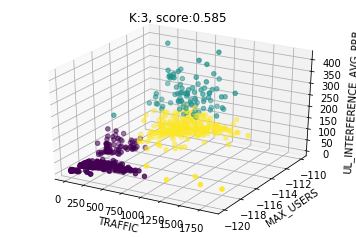

In [13]:
# Eexpected output as following:

# Tuning the parameter: n_cluster of K
Tasks:
1. loopping the parameter:n_cluster of K from 2 to 13 and generate 12 estimators
2. mesuring the silhouette_score for each estimator
3. ploting 12 clustring results into a figure
3. store the silhouette_score corrsponding to K into a dictionary named d as {k：silhouette_score，...}
4. Plot the line plot,x-axis = k values, y-axis = silhouette_score in d to visulize which k has the best performace

In [ ]:
# Create a empty to store the silhouette_score corrsponding to K as {k：silhouette_score，...}
# About 1 line code:


# Set the figure size as 12 inches by 12 inches
# About 1 line code:


# Loop the parameter K from 2 to 13
# About 12 line code:











silhouette_score with k=2 is 0.6070630028488923
silhouette_score with k=3 is 0.5854112571550695
silhouette_score with k=4 is 0.5364374320063647
silhouette_score with k=5 is 0.42244848277998875
silhouette_score with k=6 is 0.4558094052622169
silhouette_score with k=7 is 0.4566642892261117
silhouette_score with k=8 is 0.43244490343397757
silhouette_score with k=9 is 0.4069079706946419
silhouette_score with k=10 is 0.4056543892619803
silhouette_score with k=11 is 0.41147317599733413
silhouette_score with k=12 is 0.4096983636743938
silhouette_score with k=13 is 0.39920624325777404


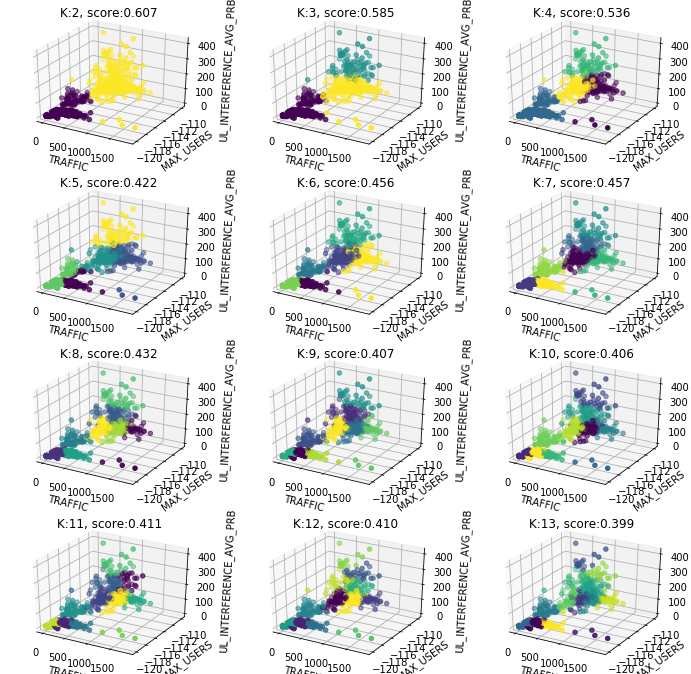

In [14]:
# Eexpected output as following:

In [ ]:
#  Plot the line plot,x-axis = k values, y-axis = silhouette_score in d to visulize which k has the best performace
# About 6 line code:







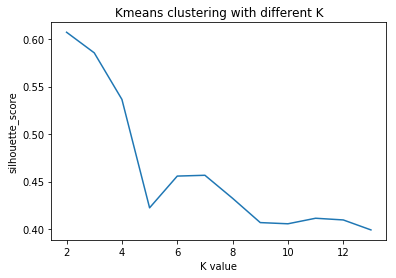

In [15]:
# Eexpected output as following:

# Cell Cluteres Interpretation
Tasks:
1. Concate the dataframe of colums:TRAFFIC,UL_INTERFERENCE_AVG_PRB, MAX_USERS with clustring labels
2. Count the number for eahc cluster and plot the bar graph
2. Calculate the mean statistics for different clusters and plot it as a side-by-side bar graph
3. Plot the box-plot of TRAFFIC among clusters
3. Plot the box-plot of UL_INTERFERENCE_AVG_PRB among clusters
3. Plot the box-plot of MAX_USERS among clusters  
Hint:   
import seaborn module, and using sns.factorplot() method to plot the parrall box-plots

In [ ]:
# Concate the dataframe with colums of TRAFFIC,UL_INTERFERENCE_AVG_PRB, MAX_USERS with clustring labels and shwo the head of it
# About 2 line code:



In [51]:
# Eexpected output as following:

,MAX_USERS,UL_INTERFERENCE_AVG_PRB,TRAFFIC,CLUSTER
0,13,-119,66.617,0
1,27,-119,79.185,0
2,30,-119,192.942,0
3,184,-112,724.263,1
4,114,-112,379.319,2


In [ ]:
# Count the number for eahc cluster and plot the bar graph
# About 4 line code:






CLUSTER
0    503
1     91
2    270
Name: TRAFFIC, dtype: int64


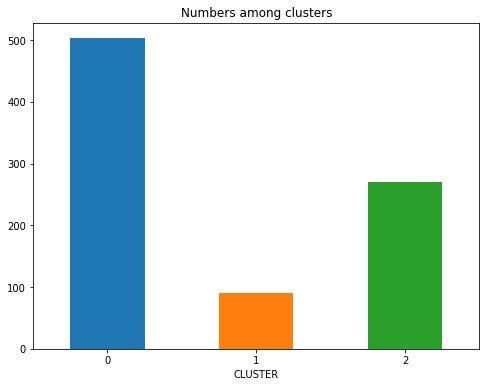

In [17]:
# Eexpected output as following:

In [ ]:
# Calculate the mean statistics for different clusters and plot it as a side-by-side bar graph
# About 4 line code:






          MAX_USERS  UL_INTERFERENCE_AVG_PRB     TRAFFIC
CLUSTER                                                 
0         26.495030              -118.658052  199.535789
1        226.439560              -111.945055  683.804824
2         84.362963              -112.540741  686.753026


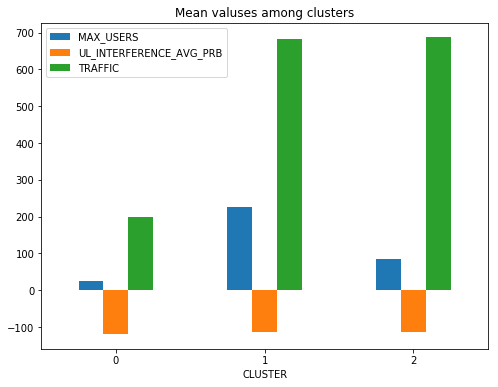

In [18]:
# Eexpected output as following:

In [ ]:
# import seaborn and plot the box-plot of TRAFFIC among clusters
# About 4 line code:
# Hint: using seaborn.factorplot() method to drop side by side boxplot, set parameters as x='CLUSTER', y='TRAFFIC', kind='box',data=df_cluster






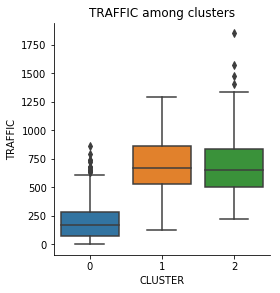

In [19]:
# Eexpected output as following:

In [ ]:
# Plot the box-plot of UL_INTERFERENCE_AVG_PRB among clusters
# About 3 line code:






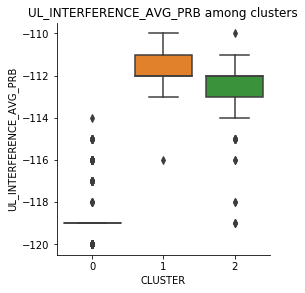

In [20]:
# Eexpected output as following:

In [ ]:
# Plot the box-plot of MAX_USERS among clusters
# About 3 line code:






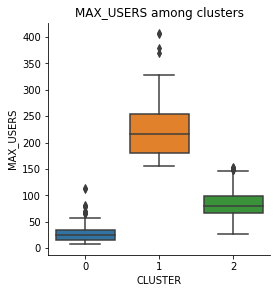

In [21]:
# Eexpected output as following:

### Cell scenarios identification by clusters

In [ ]:
#Create a new column of LABEL for different cell scenarios
# Hint using Series.map() method to map each item is Series into  a cressponding value
# About 3 line code:





In [45]:
# Eexpected output as following:

,MAX_USERS,UL_INTERFERENCE_AVG_PRB,TRAFFIC,CLUSTER,LABEL
0,13,-119,66.617,0,"Low Traffic,Low UL_INTERFERENCE_AVG_PRB,Low MA..."
1,27,-119,79.185,0,"Low Traffic,Low UL_INTERFERENCE_AVG_PRB,Low MA..."
2,30,-119,192.942,0,"Low Traffic,Low UL_INTERFERENCE_AVG_PRB,Low MA..."
3,184,-112,724.263,1,"High Traffic,High UL_INTERFERENCE_AVG_PRB,High..."
4,114,-112,379.319,2,"High Traffic,High UL_INTERFERENCE_AVG_PRB,Medi..."


# Save the clustring results into file
1. Concate the original dataframe  with clustring labels
2. Store the result into a csv file 

In [ ]:
# Concate the original dataframe  with clustring labels and show the head of it 
# About 2 line code:





In [47]:
# Eexpected output as following:

,ENODEB,CELL,MAX_USERS,UL_INTERFERENCE_AVG_PRB,TRAFFIC,CLUSTER,LABEL
0,EEIF,4485,13,-119,66.617,0,"Low Traffic,Low UL_INTERFERENCE_AVG_PRB,Low MA..."
1,GBHG,6176,27,-119,79.185,0,"Low Traffic,Low UL_INTERFERENCE_AVG_PRB,Low MA..."
2,GAGC,9092,30,-119,192.942,0,"Low Traffic,Low UL_INTERFERENCE_AVG_PRB,Low MA..."
3,EBIB,4181,184,-112,724.263,1,"High Traffic,High UL_INTERFERENCE_AVG_PRB,High..."
4,HFBE,7514,114,-112,379.319,2,"High Traffic,High UL_INTERFERENCE_AVG_PRB,Medi..."


In [48]:
# Store the result into a csv file named cell_cluster_by_kmeans.csv
# About 1 line code:


